In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

In [47]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-3.csv"

In [48]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator     inc   inc_low    inc_up  inc100  inc100_low  \
0     202245          3   47116   39170.0   55062.0      71        59.0   
1     202244          3   33923   28110.0   39736.0      51        42.0   
2     202243          3   44769   36884.0   52654.0      68        56.0   
3     202242          3   47462   40773.0   54151.0      72        62.0   
4     202241          3   48583   42388.0   54778.0      73        64.0   
5     202240          3   41927   36115.0   47739.0      63        54.0   
6     202239          3   39902   34168.0   45636.0      60        51.0   
7     202238          3   28781   23733.0   33829.0      43        35.0   
8     202237          3   21395   17076.0   25714.0      32        25.0   
9     202236          3   14120   10487.0   17753.0      21        16.0   
10    202235          3    9283    6485.0   12081.0      14        10.0   
11    202234          3    7498    4731.0   10265.0      11         7.0   
12    202233          3    7586    4442.0   10730.0      11         6.0   
13    202232          3   12222    7749.0   16695.0      18        11.0   
14    202231          3   13257    8905.0   17609.0      20        13.0   
15    202230          3   15006   10738.0   19274.0      23        17.0   
16    202229          3   20801   15829.0   25773.0      31        24.0   
17    202228          3   23387   17970.0   28804.0      35        27.0   
18    202227          3   36015   29709.0   42321.0      54        44.0   
19    202226          3   29421   24314.0   34528.0      44        36.0   
20    202225          3   22887   18582.0   27192.0      35        29.0   
21    202224          3   19294   15406.0   23182.0      29        23.0   
22    202223          3   17159   13450.0   20868.0      26        20.0   
23    202222          3   14239   10930.0   17548.0      21        16.0   
24    202221          3   11804    8686.0   14922.0      18        13.0   
25    202220          3   17355   13600.0   21110.0      26        20.0   
26    202219          3   17178   13462.0   20894.0      26        20.0   
27    202218          3   27569   22584.0   32554.0      42        34.0   
28    202217          3   35950   30255.0   41645.0      54        45.0   
29    202216          3   54405   46976.0   61834.0      82        71.0   
...      ...        ...     ...       ...       ...     ...         ...   
1955  198521          3   26096   19621.0   32571.0      47        35.0   
1956  198520          3   27896   20885.0   34907.0      51        38.0   
1957  198519          3   43154   32821.0   53487.0      78        59.0   
1958  198518          3   40555   29935.0   51175.0      74        55.0   
1959  198517          3   34053   24366.0   43740.0      62        44.0   
1960  198516          3   50362   36451.0   64273.0      91        66.0   
1961  198515          3   63881   45538.0   82224.0     116        83.0   
1962  198514          3  134545  114400.0  154690.0     244       207.0   
1963  198513          3  197206  176080.0  218332.0     357       319.0   
1964  198512          3  245240  223304.0  267176.0     445       405.0   
1965  198511          3  276205  252399.0  300011.0     501       458.0   
1966  198510          3  353231  326279.0  380183.0     640       591.0   
1967  198509          3  369895  341109.0  398681.0     670       618.0   
1968  198508          3  389886  359529.0  420243.0     707       652.0   
1969  198507          3  471852  432599.0  511105.0     855       784.0   
1970  198506          3  565825  518011.0  613639.0    1026       939.0   
1971  198505          3  637302  592795.0  681809.0    1155      1074.0   
1972  198504          3  424937  390794.0  459080.0     770       708.0   
1973  198503          3  213901  174689.0  253113.0     388       317.0   
1974  198502          3   97586   80949.0  114223.0     177       147.0   
1975  198501          3   85489   65918.0  105060.0     155       120.0   
1976  198452          3   84830  

In [49]:
raw_data[raw_data.isnull().any(axis=1)]

week  indicator  inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
1748  198919          3    0      NaN     NaN       0         NaN        NaN   

     geo_insee geo_name  
1748        FR   France

In [50]:
data = raw_data.dropna().copy()
data

week  indicator     inc   inc_low    inc_up  inc100  inc100_low  \
0     202245          3   47116   39170.0   55062.0      71        59.0   
1     202244          3   33923   28110.0   39736.0      51        42.0   
2     202243          3   44769   36884.0   52654.0      68        56.0   
3     202242          3   47462   40773.0   54151.0      72        62.0   
4     202241          3   48583   42388.0   54778.0      73        64.0   
5     202240          3   41927   36115.0   47739.0      63        54.0   
6     202239          3   39902   34168.0   45636.0      60        51.0   
7     202238          3   28781   23733.0   33829.0      43        35.0   
8     202237          3   21395   17076.0   25714.0      32        25.0   
9     202236          3   14120   10487.0   17753.0      21        16.0   
10    202235          3    9283    6485.0   12081.0      14        10.0   
11    202234          3    7498    4731.0   10265.0      11         7.0   
12    202233          3    7586    4442.0   10730.0      11         6.0   
13    202232          3   12222    7749.0   16695.0      18        11.0   
14    202231          3   13257    8905.0   17609.0      20        13.0   
15    202230          3   15006   10738.0   19274.0      23        17.0   
16    202229          3   20801   15829.0   25773.0      31        24.0   
17    202228          3   23387   17970.0   28804.0      35        27.0   
18    202227          3   36015   29709.0   42321.0      54        44.0   
19    202226          3   29421   24314.0   34528.0      44        36.0   
20    202225          3   22887   18582.0   27192.0      35        29.0   
21    202224          3   19294   15406.0   23182.0      29        23.0   
22    202223          3   17159   13450.0   20868.0      26        20.0   
23    202222          3   14239   10930.0   17548.0      21        16.0   
24    202221          3   11804    8686.0   14922.0      18        13.0   
25    202220          3   17355   13600.0   21110.0      26        20.0   
26    202219          3   17178   13462.0   20894.0      26        20.0   
27    202218          3   27569   22584.0   32554.0      42        34.0   
28    202217          3   35950   30255.0   41645.0      54        45.0   
29    202216          3   54405   46976.0   61834.0      82        71.0   
...      ...        ...     ...       ...       ...     ...         ...   
1955  198521          3   26096   19621.0   32571.0      47        35.0   
1956  198520          3   27896   20885.0   34907.0      51        38.0   
1957  198519          3   43154   32821.0   53487.0      78        59.0   
1958  198518          3   40555   29935.0   51175.0      74        55.0   
1959  198517          3   34053   24366.0   43740.0      62        44.0   
1960  198516          3   50362   36451.0   64273.0      91        66.0   
1961  198515          3   63881   45538.0   82224.0     116        83.0   
1962  198514          3  134545  114400.0  154690.0     244       207.0   
1963  198513          3  197206  176080.0  218332.0     357       319.0   
1964  198512          3  245240  223304.0  267176.0     445       405.0   
1965  198511          3  276205  252399.0  300011.0     501       458.0   
1966  198510          3  353231  326279.0  380183.0     640       591.0   
1967  198509          3  369895  341109.0  398681.0     670       618.0   
1968  198508          3  389886  359529.0  420243.0     707       652.0   
1969  198507          3  471852  432599.0  511105.0     855       784.0   
1970  198506          3  565825  518011.0  613639.0    1026       939.0   
1971  198505          3  637302  592795.0  681809.0    1155      1074.0   
1972  198504          3  424937  390794.0  459080.0     770       708.0   
1973  198503          3  213901  174689.0  253113.0     388       317.0   
1974  198502          3   97586   80949.0  114223.0     177       147.0   
1975  198501          3   85489   65918.0  105060.0     155       120.0   
1976  198452          3   84830  

In [51]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [52]:
sorted_data = data.set_index('period').sort_index()

In [53]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

1989-05-01/1989-05-07 1989-05-15/1989-05-21


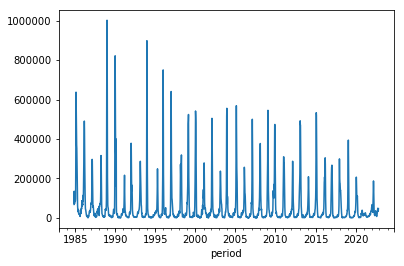

In [54]:
sorted_data['inc'].plot()

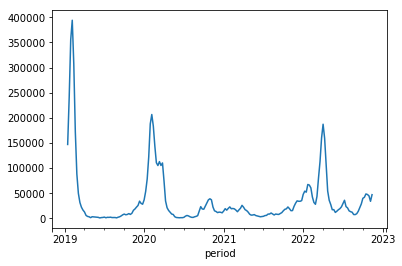

In [55]:
sorted_data['inc'][-200:].plot()

In [56]:
first_august_week = [pd.Period(pd.Timestamp(y, 8, 1), 'W')
                     for y in range(1985,
                                    sorted_data.index[-1].year)]

In [57]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc100'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

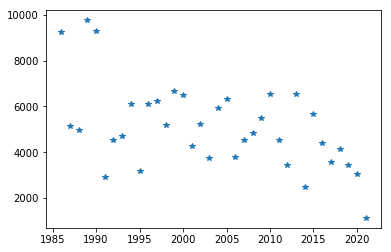

In [58]:
yearly_incidence.plot(style='*')

In [59]:
yearly_incidence.sort_values()

2021    1127
2014    2495
1991    2922
2020    3054
1995    3190
2019    3423
2012    3427
2017    3559
2003    3736
2006    3787
2018    4131
2001    4286
2016    4386
1992    4517
2011    4527
2007    4537
1993    4717
2008    4846
1988    4956
1987    5138
1998    5204
2002    5253
2009    5500
2015    5669
2004    5954
1994    6123
1996    6124
1997    6242
2005    6339
2000    6519
2010    6546
2013    6552
1999    6685
1986    9242
1990    9295
1989    9771
dtype: int64

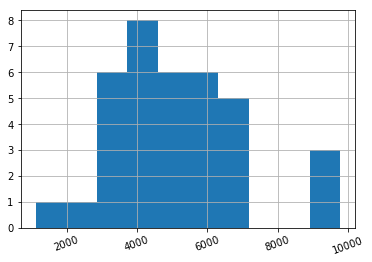

In [60]:
yearly_incidence.hist(xrot=20)